In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U scikit-learn

In [3]:
df = pd.read_csv('LaptopData.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [9]:
df['Ram'] = df['Ram'].astype('int')

In [10]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df['Weight'] = df['Weight'].astype('float')

In [12]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [13]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [14]:
df['Memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [15]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [16]:
df['SSD'] = df['Memory'].str.extract(r'(\d+) SSD', expand=False)
df['HDD'] = df['Memory'].str.extract(r'(\d+) HDD', expand=False)
df['Flash Storage'] = df['Memory'].str.extract(r'(\d+) Flash Storage', expand=False)
df['Hybrid'] = df['Memory'].str.extract(r'(\d+) Hybrid', expand=False)

# Fill missing values with 0
df[['SSD', 'HDD', 'Flash Storage', 'Hybrid']] = df[['SSD', 'HDD', 'Flash Storage', 'Hybrid']].fillna(0).astype(int)

# Display the DataFrame with the new columns
print(df[['Company', 'Memory', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']])

     Company             Memory  SSD   HDD  Flash Storage  Hybrid
0      Apple            128 SSD  128     0              0       0
1      Apple  128 Flash Storage    0     0            128       0
2         HP            256 SSD  256     0              0       0
3      Apple            512 SSD  512     0              0       0
4      Apple            256 SSD  256     0              0       0
...      ...                ...  ...   ...            ...     ...
1298  Lenovo            128 SSD  128     0              0       0
1299  Lenovo            512 SSD  512     0              0       0
1300  Lenovo   64 Flash Storage    0     0             64       0
1301      HP           1000 HDD    0  1000              0       0
1302    Asus            500 HDD    0   500              0       0

[1303 rows x 6 columns]


In [17]:
df['SSD'].unique()

array([ 128,    0,  256,  512,   32,   64, 1000,   16,  180,  240,    8])

In [18]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128])

In [19]:
df['Hybrid'].unique()

array([   0, 1000,  508])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  SSD               1303 non-null   int32  
 13  HDD               1303 non-null   int32  
 14  Flash Storage     1303 non-null   int32  
 15  Hybrid            1303 non-null   int32  
dtypes: float64(3), int32(5), int64(1), object(

In [21]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [22]:
df['IPS'] = df['ScreenResolution'].str.contains('IPS').astype(int)

In [23]:
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

In [24]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD,Flash Storage,Hybrid,Touchscreen,IPS,Width,Height
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0,0,0,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,128,0,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,256,0,0,0,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0,0,0,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,0,0,0,0,1,2560,1600


In [25]:
df['Cpu_Brand'] = df['Cpu'].str.split().str[:3].str.join(' ')

In [26]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [27]:
df['Cpu_Brand'] = df['Cpu_Brand'].apply(fetch_processor)

In [28]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [29]:
df['Gpu_Brand'] = df['Gpu'].str.split(' ').str[0]

In [30]:
df['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

# Here we have to delete some columns as follow :-
    
    1) Unnamed: 0
    2) Memory
    3) Gpu
    4) Cpu
    5) ScreenResolution

In [31]:
df.drop(['Unnamed: 0', 'Memory', 'Gpu', 'Cpu', 'ScreenResolution'], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int32  
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Price          1303 non-null   float64
 7   SSD            1303 non-null   int32  
 8   HDD            1303 non-null   int32  
 9   Flash Storage  1303 non-null   int32  
 10  Hybrid         1303 non-null   int32  
 11  Touchscreen    1303 non-null   int32  
 12  IPS            1303 non-null   int32  
 13  Width          1303 non-null   object 
 14  Height         1303 non-null   object 
 15  Cpu_Brand      1303 non-null   object 
 16  Gpu_Brand      1303 non-null   object 
dtypes: float64(3), int32(7), object(7)
memory usage: 137

In [33]:
df['Width'] = df['Width'].astype('int')
df['Height'] = df['Height'].astype('int')

In [34]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [35]:
def cat_os(ops):
    if ops=='Windows 10' or ops=='Windows 7' or ops=='Windows 10 S':
        return 'Windows'
    elif ops=='macOS' or ops=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [36]:
df['OS'] = df['OpSys'].apply(cat_os)

In [37]:
df.drop(['OpSys'],axis=1, inplace=True)

In [38]:
df.drop(columns=['Hybrid','Flash Storage'],axis=1, inplace=True)

In [39]:
df.drop(columns=['Width','Height'], axis=1, inplace=True)

<Axes: xlabel='Price', ylabel='Density'>

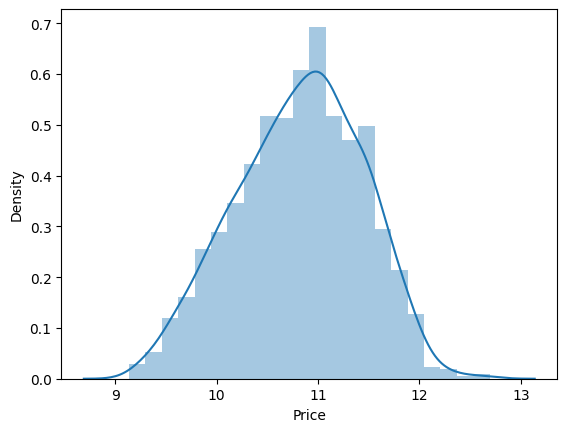

In [40]:
sns.distplot(np.log(df['Price']))

In [41]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,SSD,HDD,Touchscreen,IPS,Cpu_Brand,Gpu_Brand,OS
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,128,0,0,1,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,0,0,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,256,0,0,0,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,512,0,0,1,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,256,0,0,1,Intel Core i5,Intel,Mac


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   int32  
 4   Weight       1303 non-null   float64
 5   Price        1303 non-null   float64
 6   SSD          1303 non-null   int32  
 7   HDD          1303 non-null   int32  
 8   Touchscreen  1303 non-null   int32  
 9   IPS          1303 non-null   int32  
 10  Cpu_Brand    1303 non-null   object 
 11  Gpu_Brand    1303 non-null   object 
 12  OS           1303 non-null   object 
dtypes: float64(3), int32(5), object(5)
memory usage: 107.0+ KB


In [43]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

numeric_features = ['Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Touchscreen', 'IPS']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Company', 'TypeName', 'Cpu_Brand', 'Gpu_Brand', 'OS']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best MAE: {grid_search.best_score_}")
print(f"Test MAE: {mae}")
print(f"R-squared: {r_squared}")


Best Hyperparameters: {'regressor__max_depth': 20, 'regressor__n_estimators': 100}
Best MAE: 0.8727577918168464
Test MAE: 0.1532729394160081
R-squared: 0.8772905773994564


In [46]:
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
